#Solutions 1: Basic concepts on random variables and Probability, GEO4310

Author: Bikas C. Bhattarai

Date: August, 2015


#### Daily precipitation in Uppsala (1981-1991)

In this exercise we will analyze daily precipitation in Uppsala from 1981 to 1991. First, we read the relevant files in to Python. A data file `P_Uppsala.dat` is available, and we will load it using the excellent pandas package for Python.

Open daily precipitation data and adding names to the columns


In [183]:
#first a few administrative issues
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
# now read the file and let's just take a quick look
precip_daily = pd.read_table('P_Uppsala.dat', header=None, names=['year', 'month', 'day', 'prec'])
precip_daily.describe()

,year,month,day,prec
count,4017.000000,4017.000000,4017.00000,4017.000000
mean,1986.000000,6.523774,15.72716,2.063779
std,3.162199,3.448901,8.80014,5.012016
min,1981.000000,1.000000,1.00000,0.000000
25%,1983.000000,4.000000,8.00000,0.000000
50%,1986.000000,7.000000,16.00000,0.000000
75%,1989.000000,10.000000,23.00000,1.900000
max,1991.000000,12.000000,31.00000,136.600000


From the output we can see that each record (year, month, day, prec) or what you may think of as a row, has 4017 entries. The descriptive statistics for each column is shown. Let's take a look at the data types:

In [142]:
precip_daily.dtypes

year       int64
month      int64
day        int64
prec     float64
dtype: object

So we see that even though the describe function outputs float values, are dtypes are in fact ints for year, month, day. This is good, as it takes less memory. Pandas figured this out automatically when reading in the data, though we could have defined it:



In [143]:
precip_daily = pd.read_table('P_Uppsala.dat', header=None, names=['year', 'month', 'day', 'prec'], 
dtype={'year':np.int64, 'month':np.int64, 'day':np.int64, 'prec':np.float64})

There are many other options for reading from text files, and reading data in general. Become familiar with the various features (and power!) of pandas to handle getting data into your workflow.

###Calculating yearly total precipitation
We're going to use some of the features of the `pandas.dataframe` to calculate the yearly precipitation. In generally, for every year we have to sum the daily data. We could do this by looping over all the unique years that are in the precip_daily data:

In [144]:
years = set(precip_daily.year)
years

{1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991}

But there is a much more efficient mechanism built in to pandas; the `groupby` function. This groups data by one of the columns of data in the data frame:

In [145]:
precip_annual = precip_daily.groupby('year')['prec'].sum()
precip_annual

year
1981    892.5
1982    754.9
1983    846.6
1984    750.9
1985    698.5
1986    895.2
1987    599.2
1988    792.5
1989    513.4
1990    814.2
1991    732.3
Name: prec, dtype: float64

Let's take a closer look at what we're doing here. The `groupby` function applies a function to a grouping. The grouping is either defined by a function (which can be passed as the first argument) or a column index. Compare the following:

In [146]:
precip_annual = precip_daily.groupby('year')['prec'].sum()
print precip_annual

grouped = precip_daily.groupby('year').sum()
print grouped

year
1981    892.5
1982    754.9
1983    846.6
1984    750.9
1985    698.5
1986    895.2
1987    599.2
1988    792.5
1989    513.4
1990    814.2
1991    732.3
Name: prec, dtype: float64
      month   day   prec
year                    
1981   2382  5738  892.5
1982   2382  5738  754.9
1983   2382  5738  846.6
1984   2384  5767  750.9
1985   2382  5738  698.5
1986   2382  5738  895.2
1987   2382  5738  599.2
1988   2384  5767  792.5
1989   2382  5738  513.4
1990   2382  5738  814.2
1991   2382  5738  732.3


In the first case, the groupby function returns just the sum of the 'prec' column, after grouping by the years. In the second case, the function returns the sum of all the columns grouped by years. We want the first case.

We can carry this on to obtain monthly data as well:

In [147]:
precip_monthly = precip_daily.groupby(['year', 'month']) ['prec'].sum()
print precip_monthly
print type(precip_monthly)

year  month
1981  1         32.1
      2         26.2
      3         61.8
      4         22.2
      5         22.5
      6         98.4
      7         79.8
      8        162.5
      9         12.6
      10       121.5
      11       144.1
      12       108.8
1982  1         41.8
      2         30.3
      3         54.3
...
1990  10        79.4
      11        59.7
      12        42.4
1991  1         58.5
      2         29.3
      3         40.5
      4         23.8
      5         77.5
      6        142.3
      7         53.8
      8        124.1
      9         71.2
      10        26.8
      11        47.4
      12        37.1
Name: prec, Length: 132, dtype: float64
<class 'pandas.core.series.Series'>


This is quite powerful for data management, and it is all optimized to use underlying C code. There may be faster solutions, but overall it will suit your data management and timeseries analysis needs.

Maybe this format is not optimal, however, or you would like to write out the data to a table in a .csv file. This can be easily achieved by using some features of the returned `pandas.Series`:

In [148]:
#we may want it as a table/dataframe
monthly = precip_monthly.unstack().head(11)
print monthly
print type(monthly)

month    1     2      3     4      5      6      7      8      9      10  \
year                                                                       
1981   32.1  26.2   61.8  22.2   22.5   98.4   79.8  162.5   12.6  121.5   
1982   41.8  30.3   54.3  49.9  191.8   37.4   51.5   77.4   48.3   45.8   
1983   77.6   9.9  106.6  46.1   35.7  105.3   80.0   25.4  187.8   58.3   
1984   71.8  28.8   34.2  10.7   28.8   96.9   67.4   51.1  145.0  114.0   
1985   82.5  37.2   42.1  68.5   23.4   24.9  103.7   50.4   76.3   53.0   
1986   50.3  12.1   68.8  50.9   76.6   39.3  120.5  234.0   55.9   44.5   
1987   22.5  27.9   21.7   4.3   54.7   77.4   92.4  121.7   65.1   33.6   
1988   71.8  63.9   40.4  36.7   41.2   51.2  106.0  172.9   35.6   69.0   
1989    9.2  28.1   50.7  54.8   37.9   41.5   11.2   68.0   23.4   74.4   
1990   74.0  78.5   56.3  46.2   29.8   25.2  128.3   41.9  152.5   79.4   
1991   58.5  29.3   40.5  23.8   77.5  142.3   53.8  124.1   71.2   26.8   

month     1

If you want to export data in to .csv format then

monthly_ppt.to_csv('monthly.csv', index = 1, header = 1)

Woking from monthly data
Open monthly precipitation data given in working folder

In [149]:
precip_mon = pd.read_table('P_uppmonth1.dat')

##### 1.1 Compute for each month: mean, median, mode, standard deviation, coefficient of variation, minimum and maximum. Plot these values to show the annual variation.

To calculate the yearly sum of the precipitation



In [150]:
annual_sum= precip_mon.set_index('year').sum(axis=1) 
annual_sum

year
1981    894
1982    754
1983    847
1984    751
1985    699
1986    897
1987    600
1988    793
1989    513
1990    814
1991    733
dtype: int64

If you dont want to keep the year info for each sum then

In [151]:
precip_mon.drop('year', axis=1).sum(axis=1)

0     894
1     754
2     847
3     751
4     699
5     897
6     600
7     793
8     513
9     814
10    733
dtype: int64

Statistical calculation becomes easier when defining dataframe. We can define data frame in the following way:

In [152]:
mon_df = pd.DataFrame(precip_mon, columns = precip_mon.columns[1:])
mon_df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,32,26,62,22,23,98,80,163,13,122,144,109
1,42,30,54,50,192,37,52,77,48,46,74,52
2,78,10,107,46,36,105,80,25,188,58,36,78
3,72,29,34,11,29,97,67,51,145,114,51,51
4,83,37,42,69,23,25,104,50,76,53,74,63
5,50,12,69,51,77,39,121,234,56,45,54,89
6,23,28,22,4,55,77,92,122,65,34,54,24
7,72,64,40,37,41,51,106,173,36,69,38,66
8,9,28,51,55,38,42,11,68,23,74,55,59
9,74,79,56,46,30,25,128,42,153,79,60,42


##### To calculate monthly mean

In [153]:
mon_mean = mon_df.mean(axis=0).round(1)
mon_mean

Jan     54.0
Feb     33.8
Mar     52.5
Apr     37.7
May     56.5
Jun     67.1
Jul     81.4
Aug    102.6
Sep     79.5
Oct     65.5
Nov     62.5
Dec     60.9
dtype: float64

##### To calculate Monthly Median

In [154]:
mon_median = mon_df.median(axis = 0)
mon_median

Jan    59
Feb    29
Mar    51
Apr    46
May    38
Jun    51
Jul    80
Aug    77
Sep    65
Oct    58
Nov    54
Dec    59
dtype: float64

##### Monthly Maximum precipitation

In [155]:
mon_max = mon_df.max(axis = 0)
mon_max

Jan     83
Feb     79
Mar    107
Apr     69
May    192
Jun    142
Jul    128
Aug    234
Sep    188
Oct    122
Nov    144
Dec    109
dtype: int64

##### Monthly min precipitation

In [156]:
mon_min = mon_df.min(axis=0)
mon_min

Jan     9
Feb    10
Mar    22
Apr     4
May    23
Jun    25
Jul    11
Aug    25
Sep    13
Oct    27
Nov    36
Dec    24
dtype: int64

##### Monthly Mode

In [157]:
mon_mode = mon_df.mode(axis = 0)
mon_mode

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,72,28,NaN,46,23,25,80,NaN,NaN,NaN,54,NaN
1,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74,NaN


##### Monthly standard deviation

In [158]:
mon_std = mon_df.std(axis=0).round(1)
mon_std

Jan    24.7
Feb    20.5
Mar    22.4
Apr    20.1
May    48.9
Jun    38.9
Jul    34.3
Aug    66.1
Sep    57.3
Oct    30.5
Nov    29.6
Dec    24.3
dtype: float64

##### Coefficient of Variation

In [159]:
import scipy.stats as ss

mon_cv= ss.variation(mon_df, axis=0).round(1)
mon_cv

array([ 0.4,  0.6,  0.4,  0.5,  0.8,  0.6,  0.4,  0.6,  0.7,  0.4,  0.5,
        0.4])

##### Showing the annual variation by making plots

plot several parameters (mean, median, max, min) in one plot.

Join the data sets (i.e. mean, median, max and min)

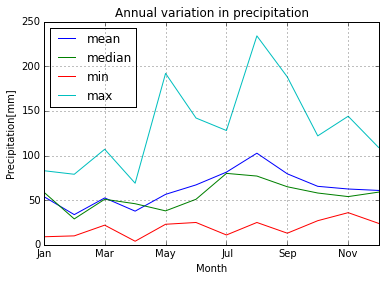

In [160]:
import matplotlib.pyplot as plt
all_stats = pd.concat([mon_mean,mon_median,mon_min,mon_max], axis = 1)
all_stats['Jan':'Dec'].plot()
plt.legend(['mean', 'median', 'min', 'max'], loc='upper left') 
plt.xlabel('Month') 
plt.ylabel('Precipitation[mm]') 
plt.title('Annual variation in precipitation') 
plt.show()

##### Ploting standard deviation

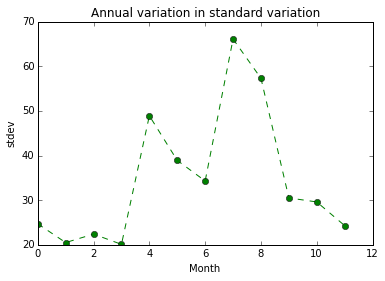

In [161]:
plt.plot(mon_std[0:12], linestyle="dashed", marker="o", color="green") 
plt.title('Annual variation in standard variation') 
plt.ylabel('stdev') 
plt.xlabel('Month') 
plt.show() 

##### Plotting coefficient of variation (CoV)

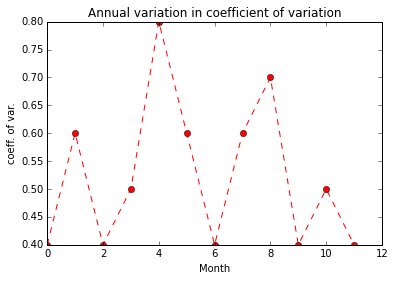

In [162]:
plt.plot(mon_cv[0:12], linestyle="dashed", marker="o", color="red")
plt.title('Annual variation in coefficient of variation') 
plt.ylabel('coeff. of var.')
plt.xlabel('Month')
plt.show()


##### 1.2 Calculate the probability for daily precipitation that :

1) Equal zero 

2) More than zero

3) More than 10 mm and 

4) More than 10 mm for the days with precipitation.

##### 1. Equals to zero

Probability of daily precipitation that equal zero is found by divide the number of days with zero precipitation by total number of days in the period.


In [163]:
from __future__ import division
total_no_of_zero_events = sum(x==0 for x in precip_daily['prec'])
total_no_of_days_with_prec = sum(x>=0 for x in precip_daily['prec'])
probability_of_zero_events = (total_no_of_zero_events / total_no_of_days_with_prec*100)
print 'Probability of daily precipitation that equals to zero events = %.1f ' % (probability_of_zero_events)

Probability of daily precipitation that equals to zero events = 52.8 


##### 2. More than zero

Probability of daily precipitation more than zero is calculated by divide the number of days with precipitation by total number of days in the period.

In [164]:
probability_more_than_zero = (sum(x>0 for x in precip_daily['prec'])/sum(x>=0 for x in precip_daily['prec']))*100

print 'Probability of daily precipitation that equals to more than zero= %.1f ' % (probability_more_than_zero)

Probability of daily precipitation that equals to more than zero= 47.2 


or alternatively, since the probability of daily precipitation more than zero, and the probability of daily precipitation equal zero is mutually exclusive, the probability of daily precipitation more then zero is found by subtracting the probability of daily precipitation equal zero.

P(X>0) = 1-52.8

= 47.2

##### 3. More than 10 mm

In [165]:
more_than_10 = (sum(x>10 for x in precip_daily['prec'])/sum(x>=0 for x in precip_daily['prec']))*100

print 'Probability of daily precipitation that more than 10 mm = %.1f ' % (more_than_10)

Probability of daily precipitation that more than 10 mm = 5.8 


Note: if you write x >= 10 then it will also count the value of 10 (i.e inclusive function and the value becomes   5.9497)

##### 4.  More than 10 mm for the day with precipitation

In [166]:
more_than_10_with_ppt = (sum(x>10 for x in precip_daily['prec'])/sum(x>0 for x in precip_daily['prec']))*100

print 'Probability of daily precipitation that more than 10 mm  for the day with precipitation = %.1f' % (more_than_10_with_ppt)

Probability of daily precipitation that more than 10 mm  for the day with precipitation = 12.2


##### 1.3 From the daily data, calculate the maximum 1-day, 3-day and 5-day average rainfall amount, and state the date/period

##### One day maximum precipitation with date

In [167]:
odmax = precip_daily[precip_daily['prec']==precip_daily['prec'].max()]
odmax

,year,month,day,prec
505,1982,5,21,136.6


If the data are in column then we can find out by

In [168]:
odmax = precip_daily.sort(['prec'],ascending = False).head(1)
odmax

,year,month,day,prec
505,1982,5,21,136.6


or we can also calculate one day maximum by

In [169]:
odmax = precip_daily['prec'].max()  
round(odmax,1)                         ##[ Note: it will only show maximum value i.e with out date]

136.6

Hence, the maximum 1-day rainfall amount in Uppsala between 1981 and 1991 is 136.6 on the 21.05.1982.

##### Maximum 3 day average rainfall 

In [170]:
df = pd.read_table('P_Uppsala.dat', sep='\s+', header = None, names = ['year','month','day','prec'])

In [171]:
df['mv']=pd.rolling_mean(df['prec'], 3)

df[df['mv']==df['mv'].max()]


,year,month,day,prec,mv
507,1982,5,23,5.6,47.4


Maximum 3-day rainfall amount in Uppsala is 47.4 mm  on 23.05.1982

##### Maximum 5 day average rainfall 

In [172]:
df['mv5']=pd.rolling_mean(df['prec'], 5)
df[df['mv5']==df['mv5'].max()]

,year,month,day,prec,mv,mv5
508,1982,5,24,6.4,4,29.72
509,1982,5,25,0.0,4,29.72


Maximum 5-day rainfall amount in Uppsala is 29.72 mm  happens in two different periods,  24.05.1982 and 25.05.1982

##### 1.4 length of the maximum dry-spell days and the maximum wet-spell days of daily rainfall

To calculate maximum dry-spell days according to month

In [173]:
df = pd.read_table('P_Uppsala.dat', sep='\s+', header = None, names = ['year','month','day','prec'])

def func(group): return (group.prec != 0).astype(int).cumsum().value_counts().values[0] - 1 

df1= df.groupby(['year','month']).apply(func)
df1.max() 

22

In [174]:
df1.idxmax()

(1981, 5)

Hence, the maximum dry-spell is 22 in May, 1981

Note: There might be continuous longer dry-spell periods starting from one month and ending in next month, in this case we have to change the code slightly

In [175]:
df2= df.groupby(['year']).apply(func)
df2

year
1981    22
1982    15
1983    22
1984    12
1985    14
1986     9
1987    15
1988    11
1989    22
1990    19
1991    12
dtype: int64

Hence in 1981, 1983 and 1989 have the same dry-spell of 22.

##### To calculate maximum wet-spell days according to month

In [176]:
def func(group): 
        return (group.prec == 0).astype(int).cumsum()[group.prec != 0].value_counts().iloc[0] 

df2= df.groupby(['year']).apply(func)
df2

year
1981     9
1982    10
1983    16
1984    14
1985    13
1986    13
1987    18
1988    23
1989     9
1990    10
1991    12
dtype: int64

[Note: when you group by month also then you will get different result because, the rainy days starting form one month and ending in next month so the result is different.]

Hence, Maximum wet-spell days in Uppsala from 1981 to 1991 is 23 on 1988.

### part II

In this section we will work on Tahoe lake data.
Read the data which is provided

In [177]:
tahoe = pd.read_table('Tahoe.dat',sep='\s+', header = None, names = ['depth','nan'])


Define dataframe

In [178]:
df= pd.DataFrame(tahoe['depth'])


Note: If you want to plot regular histogram then just give the command plt.hist(df['depth'])


##### Plot relative histogram

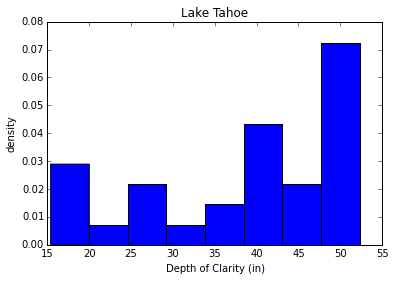

In [179]:
plt.hist(df['depth'], bins= 8, normed = True) 
plt.ylabel('density')
plt.xlabel('Depth of Clarity (in)')
plt.title('Lake Tahoe')
plt.show()

##### Plot cumulative relative frequency

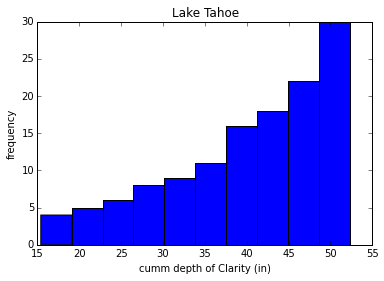

In [180]:
plt.hist(df['depth'], bins= 10,  cumulative = True)
plt.xlabel('cumm depth of Clarity (in)')
plt.ylabel('frequency')
plt.title('Lake Tahoe')
plt.ylabel('frequency')

##### Calculate the probability that the depth of lake more than 40 inch.

In [181]:
prob_more_than_40 = (sum(x>40 for x in df['depth'])/sum(x>=0 for x in df['depth']))*100

print 'Probability that the depth of lake is more than 40 inch = %.1f '  % (prob_more_than_40)

Probability that the depth of lake is more than 40 inch = 50.0 


##### Calculate the probability that the depth of lake in between 15 to 40 inch.

In [182]:
Probability_betwee_15_30 = (df['depth'].between(15,30).sum()/(df['depth'].count()))*100

print 'Probability that the depth of lake is in between 13 to 40 inch = %.2f '  % (Probability_betwee_15_30)

Probability that the depth of lake is in between 13 to 40 inch = 26.67 


### Part III 

##### The frequency function for a continuous stochastic variable is shown below. Solve the problems analytically.

$$
f(x) = \left\{
        \begin{array}{ll}
            cx^2 & \quad 0 < x < 1 \\
            0 & \quad \text{otherwise}
        \end{array}
    \right.
$$

1. Find the value for c so that f(x) becomes a density function. 
2. Calculate Prob(x < 0), Prob(x = 0.5), Prob(x > 1), Prob(0<=x<=0.5) and Prob(0<x< 0.5)
3. Find the distribution function, F(x)
4. Find the median
5. Find the mode
6. Calculate the expectation, E(x)
7. Calculate the variance, var(x)

#### 1. Find the value for c so that f(x) becomes a density function

To find the probability density function f d (x), one has to integrate f (x) from 0 and 1. This integral is equal to 1 as it shall be a density function.

$\int_{-\infty }^{\infty }f_{d}(dt)$ = $\int_{0}^{1} ct²(dt)$ = 1


= $ \frac{ct³}{3}|_{0}^{1} $

= $ \frac{1³c}{3}$ - $ \frac{0³c}{3}$ = 1

c = 3

That means, the density function is



$$
f(x) = \left\{
        \begin{array}{ll}
            3x^2 & \quad 0 < x < 1 \\
            0 & \quad \text{otherwise}
        \end{array}
    \right.
$$



##### 2. Calculate Prob(x < 0), Prob(x = 0.5), Prob(x > 1), Prob(0<=x<=0.5) and Prob(0<x< 0.5)

P rob(x < 0) = 0

P rob(x = 0.5) = F (0.5) − F (0.5) = 0

P rob(x > 1) = 0

P (0 ≤ x ≤ 0.5) = F (0.5) − F (0) = 0.125

P (0 < x < 0.5) = F (0.5) − F (0) = 0.125

##### 3. Find the distribution function, F(x)

The distribution function is defined as the integral of the density function.

$ F(x) =  F(x) = x³ for 0<x<1 $

##### 4. find the median

The median for a continuous data is defined as

$\int_{-\infty }^{\mu_{md} }f_{x}(dx)$ = $\int_{\mu_{md}}^{\infty} f_{x}(dx)$ = 0.5

which means, the median $\mu_{md}$ is that value, which divides the density function into two parts having equal areas of 2 1 each. For the given function, one obtains:

$\int_{0 }^{\mu_{md} }3x²(dx)$ = $\int_{\mu_{md}}^{1} 3x²(dx)$ = 0.5

$ x³|_{\mu_{md}}^{1} $ = 0.5

1³ - $\mu_{md}^{3}$ = 0.5 
 
$\mu_{md}$ = $\sqrt[3]{1-0.5}$
 
 
$\mu_{md}$ = 0.7937

Therefore the median of the analysed density function is $\mu_{md}$ = 0.7937.

##### 5. find the mode

The function has no mode. For continuous variables the mode is defined as the maximum of the function. As this function has a discontinuity at the point, where it seems to have its maximum (at x = 1), one cannot calculate the derivation at that specific point. That means, $ \frac{df(1)}{dx}$, the first derivation, is not defined.

##### 6. Calculate the expectation, E(x)

$ E(X) = \int_{0 }^{1} x f(x)dx =  \int_{0 }^{1} x 3x² dx   =  \frac{3}{4}$

##### 7. Calculate the variance, var(x)

$ V(X) = E(X²) − (EX)²$

First, calculating E(X²)

$ E(X²) = \int_{0 }^{1} x²  3x² dx  = \int_{0 }^{1} 3x⁴ dx $

$ \left |\frac{3x⁵}{5}  \right |_{0}^{1} = \frac{3}{5}$ 

Then we can calculate $V(X)$

$V(X) = \frac{3}{5} -(\frac{3}{5})^2 $

$V(X)= \frac{3}{80}$